In [9]:
from library.common import Database
import pandas as pd

db = Database()
db_table = 'owid_co2_greenhouse_gas_emissions'
owid_df = pd.read_sql(db_table, db.config)

owid_df
full_features = list(owid_df.columns)
#drop continuents
owid_df = owid_df.dropna(subset = ['iso_code']).copy()

print("Data loaded")

Data loaded


In [10]:
# selected = \
#     ['iso_code',
#      'year',
#      'co2',
#      'consumption_co2',
#      'co2_growth_abs',
#      'trade_co2',
#      'co2_per_gdp',
#      'co2_per_unit_energy',
#      'coal_co2',
#      'cement_co2',
#      'flaring_co2',
#      'gas_co2',
#      'oil_co2',
#      'other_industry_co2',
#      'population',
#      'gdp',
#      'primary_energy_consumption']

selected = ["iso_code", "year","trade_co2"]


In [11]:
dataset = owid_df[selected].copy()

dataset = dataset.fillna(0)
global_df = dataset.groupby('year').sum().reset_index(drop = False)
timeseries = global_df[:-2].copy()

In [12]:
import numpy as np
import pmdarima as pm

def get_optimal_param(timeseries):
    stepwise_fit = pm.auto_arima(timeseries,
                                 max_p=20,
                                 max_d=20,
                                 max_q=20,
                                 seasonal=False,
                                 error_action='ignore',
                                 suppress_warnings=True,
                                 trace =  True,
                                 stepwise=True)  # set to stepwise
    return stepwise_fit.get_params().get('order')

# this is a dataset from R
# wineind = load_wineind().astype(np.float64)

result = dict()
for feature in selected[2:]:
    print(feature)
    series = dataset[feature].to_numpy()
    result[feature] = get_optimal_param(series)

print(result)

trade_co2
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=192355.601, Time=2.57 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=227493.055, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=193296.585, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=209637.350, Time=0.71 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=192360.700, Time=1.22 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=193178.856, Time=2.13 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=192374.076, Time=2.06 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=192296.718, Time=6.23 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=192357.318, Time=2.01 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=192295.045, Time=7.64 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=192272.104, Time=11.14 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=192277.597, Time=7.93 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=191629.153, Time=11.87 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=191632.476, Time=8.

In [13]:
import json

with open('arima_parametersX.json', 'w') as f:
    json.dump(result, f)

co2
Data shape: 21948
Data head:
0    7624058.0
1    7752117.0
2    7840151.0
3    7935996.0
4    8039684.0
Name: population, dtype: float64


/Users/koonleong/Documents/UM/UMMADS/Courses - Current/SIADS697-Capstone/power_emissions/venv/lib/python3.7/site-packages/pmdarima/utils/visualization.py:223: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  vlines_kwargs=vlines_kwargs, **kwargs)
/Users/koonleong/Documents/UM/UMMADS/Courses - Current/SIADS697-Capstone/power_emissions/venv/lib/python3.7/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


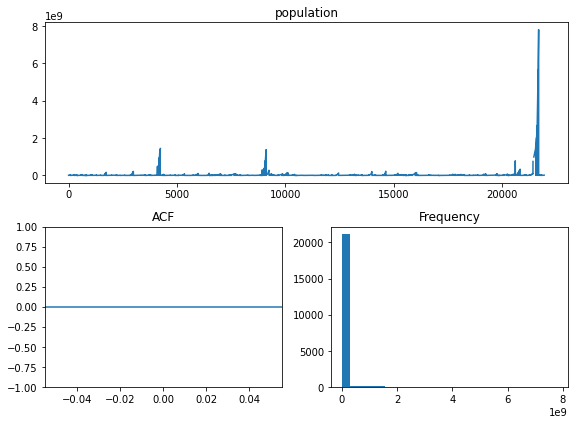

/Users/koonleong/Documents/UM/UMMADS/Courses - Current/SIADS697-Capstone/power_emissions/venv/lib/python3.7/site-packages/pmdarima/utils/visualization.py:223: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  vlines_kwargs=vlines_kwargs, **kwargs)
/Users/koonleong/Documents/UM/UMMADS/Courses - Current/SIADS697-Capstone/power_emissions/venv/lib/python3.7/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


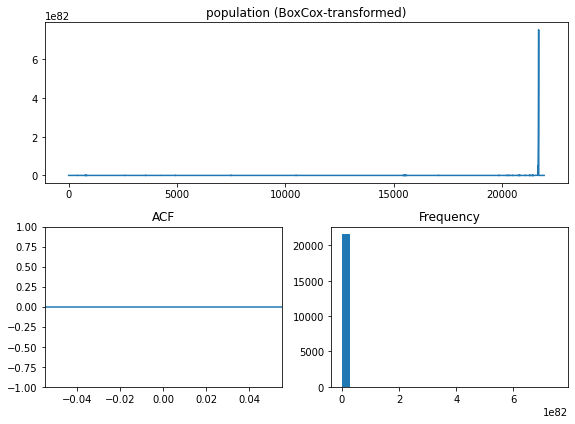


As evidenced by the more normally distributed values in the transformed series,
using a Box-Cox transformation may prove useful prior to fitting your model.

